# CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING

Project focuses on segmenting mall customers using the K-Means clustering algorithm to uncover distinct customer groups based on age, annual income, and spending score. The step-by-step analysis includes data exploration, visualization, and clustering, aiming to provide actionable insights for marketing strategies and improved customer targeting.

Data Source: Kaggle. https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

#### INITIAL DATA EXPLORATION
The dataset, named `mall_customers.csv`, contains information about 200 customers. It initially included five columns: `CustomerID`, `Gender`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`. The column `CustomerID` was removed as it was not relevant for analysis. Two columns were renamed for simplicity: `Annual Income (k$)` to Annual Income and `Spending Score (1-100)` to Spending Score. The dataset was examined for missing values, data types, and basic descriptive statistics, confirming that it is complete and ready for analysis.

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
data = pd.read_csv('mall_customers.csv')
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
# Dataset Shape
data.shape

(200, 5)

In [ ]:
# Column Names
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Drop Unnecessary Columns
data.drop(['CustomerID'], axis=1, inplace=True)
# Rename Columns
data.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

In [ ]:
# Check Data Types
data.dtypes

,0
Gender,object
Age,int64
Annual Income,int64
Spending Score,int64


In [ ]:
# Check Missing Values
data.isnull().sum()

,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


In [ ]:
# Descriptive Statistics
data.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### DISTRIBUTION OF KEY VARIABLES
Distribution plots are used to visualize the spread and density of data for key numerical variables. This helps in understanding their range, central tendency, and overall distribution.

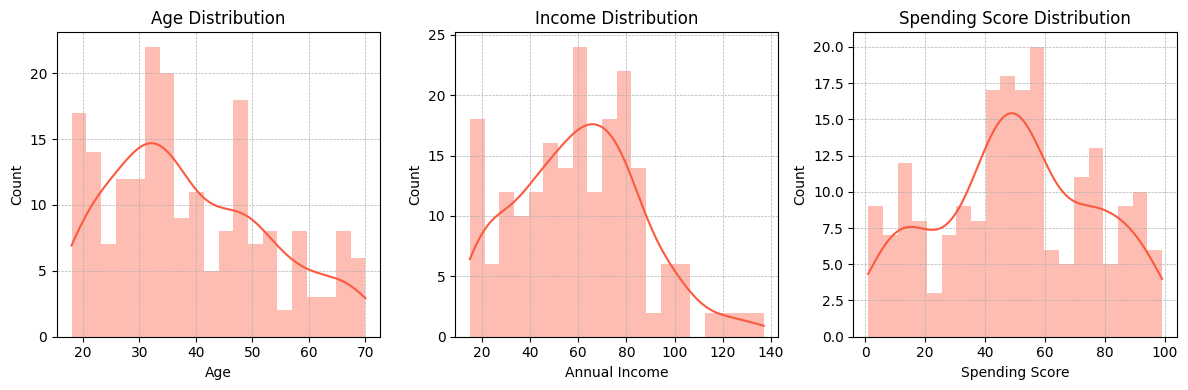

In [ ]:
# Distribution Plot
plt.figure(figsize=(12, 4))

columns = ['Age', 'Annual Income', 'Spending Score']
titles = ['Age Distribution', 'Income Distribution', 'Spending Score Distribution']

for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=20, kde=True, color='#fc5a40', edgecolor=None, alpha=0.4)
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



> The plots show the distribution of Age, Annual Income, and Spending Score. The Age distribution ranges from 18 to 70 years, with a noticeable peak around the age of 30, indicating a larger concentration of customers in this age group. The distribution gradually declines after 40 years.  
The Annual Income (in thousands) shows a roughly normal distribution, ranging from 15k to 140k. Most customers fall within the 40k to 80k range, with a clear peak near 60k, suggesting this is the most common income bracket in the dataset.  
The Spending Score ranges from 1 to 100 and exhibits a bimodal distribution. The first peak is observed around scores of 40 to 50, and the second peak occurs between 70 and 80. This indicates two distinct clusters of customer spending behaviors, with one group being moderate spenders and the other showing higher spending tendencies.


#### GENDER-BASED DISTRIBUTION ANALYSIS
Violin plots are used to compare the distribution of numerical variables (Age, Annual Income, and Spending Score) across genders. This helps to observe variations and patterns in data based on gender.

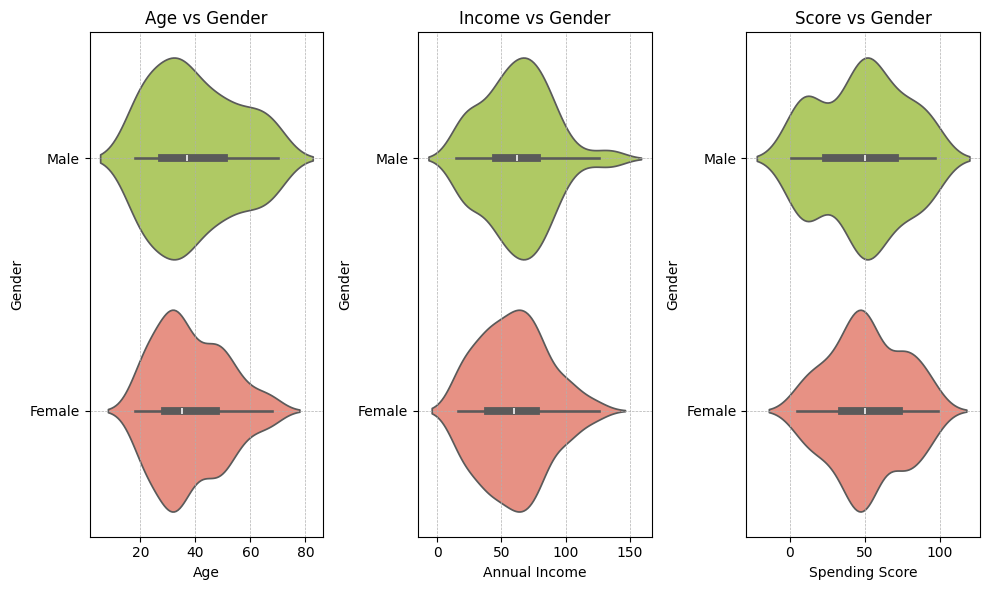

In [ ]:
# Violin Plot Based on Gender
plt.figure(figsize=(10, 6))

columns = ['Age', 'Annual Income', 'Spending Score']
titles = ['Age vs Gender', 'Income vs Gender', 'Score vs Gender']

for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x=col, y='Gender', data=data, palette={'Male': '#b7da53', 'Female': '#f88573'})
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



> The violin plots reveal distinct gender-based variations in the dataset. For Age, both male and female customers exhibit a range between approximately 18 and 70 years. However, males show a slightly wider distribution, particularly in the age bracket of 50 to 70, compared to females who have a more concentrated distribution around 20 to 40 years.  
In terms of Annual Income (in thousands), male customers tend to have a higher concentration in the mid-income range (40k to 80k), with a noticeable spread extending up to 140k. Female customers, on the other hand, exhibit a narrower income range, primarily concentrated between 30k and 80k, with fewer customers in the higher income brackets.  
For Spending Score, male customers display a more concentrated distribution with peaks around scores of 40 and 60. In contrast, female customers have a broader and more even spread across the entire range of 20 to 100, suggesting a greater diversity in spending behavior among female customers.



#### CATEGORY-BASED ANALYSIS
Categorizing numerical variables into bins allows for a clearer understanding of distributions within specific ranges and makes it easier to compare counts across categories. Here, `Age`, `Spending Score`, and `Annual Income` are divided into categories for analysis.

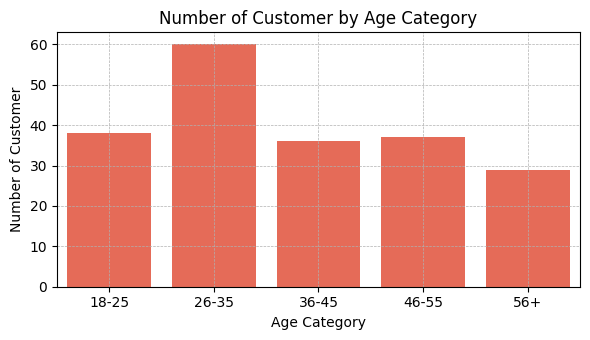

In [ ]:
# Devide Age in Different Categories
age_bins = [18, 26, 36, 46, 56, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56+']
data['Age Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count Plot for Age Category
plt.figure(figsize=(6, 3.5))
sns.countplot(x='Age Category', data=data, color='#fc5a40')
plt.title('Number of Customer by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Customer')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



> The count plot shows the distribution of customers across different age categories. The 26-35 category has the highest number of customers, with around 60 individuals, followed by the 18-25, 36-45, and 46-55 categories, each having approximately 35 to 40 customers. The 56+ category has the fewest customers, with about 20 individuals. This analysis highlights that the majority of customers are younger adults, particularly in the age range of 26 to 35.



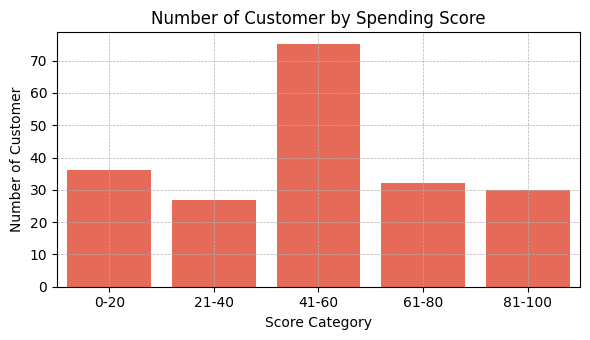

In [ ]:
# Devide Score into Different Categories
score_bins = [0, 21, 41, 61, 81, 101]
score_bins_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
data['Score Category'] = pd.cut(data['Spending Score'], bins=score_bins, labels=score_bins_labels, right=False)

# Count Plot for Spending Score
plt.figure(figsize=(6, 3.5))
sns.countplot(x='Score Category', data=data, color='#fc5a40')
plt.title('Number of Customer by Spending Score')
plt.xlabel('Score Category')
plt.ylabel('Number of Customer')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



> The count plot highlights the distribution of customers across different spending score categories. The 41-60 category has the highest number of customers, with approximately 70 individuals. The 0-20 and 61-80 categories each contain around 35 customers, while the 21-40 and 81-100 categories have approximately 30 customers each. This analysis indicates that most customers fall into the moderate spending score range of 41-60.



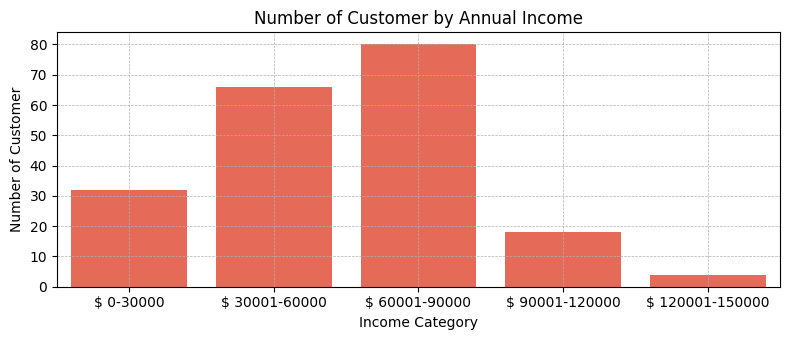

In [ ]:
# Devide Annual Income into Different Categories
income_bins = [0, 31, 61, 91, 121, 151]
income_bins_labels = ['$ 0-30000', '$ 30001-60000', '$ 60001-90000', '$ 90001-120000', '$ 120001-150000' ]
data['Income Category'] = pd.cut(data['Annual Income'], bins=income_bins, labels=income_bins_labels, right=False)

# Count Plot for Annual Income
plt.figure(figsize=(8, 3.5))
sns.countplot(x='Income Category', data=data, color='#fc5a40')
plt.title('Number of Customer by Annual Income')
plt.xlabel('Income Category')
plt.ylabel('Number of Customer')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



> The count plot illustrates the distribution of customers across different annual income categories. The 60001-90000 category has the highest number of customers, with around 80 individuals. The 30001-60000 category follows, with approximately 70 customers. The 0-30000 category contains about 30 individuals, while the 90001-120000 category has around 20 customers. The 120001-150000 category has the fewest customers, with less than 10 individuals. This analysis highlights that most customers belong to the middle-income bracket, particularly between 60001-90000.



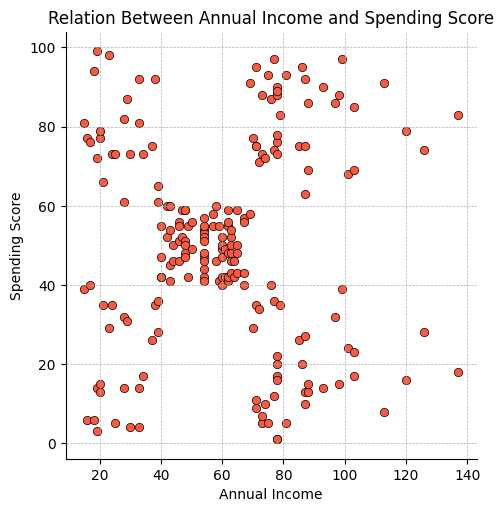

In [ ]:
# Relation Between Income and Score
sns.relplot(x='Annual Income', y='Spending Score', data=data, color='#fc5a40', edgecolor='black', linewidth=0.5)
plt.title('Relation Between Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### K-MEANS CLUSTERING
This section explores clustering using the K-Means algorithm across three feature combinations: Age & Spending Score, Annual Income & Spending Score, and the combined features Age, Annual Income, & Spending Score. Each approach includes the Elbow Method to determine the optimal number of clusters, followed by visualizing the clusters.

To determine the optimal number of clusters for K-Means clustering, the Elbow Method was applied by plotting the Within-Cluster Sum of Squares (WCSS) against different values of K. The Elbow Method plot indicates that the optimal number of clusters is at the "elbow point," where the WCSS starts to level off.

In [ ]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

##### Clustering with Age and Spending Score
The first clustering attempt used `Age` and `Spending Score`. The Elbow Method was applied to determine the optimal number of clusters.

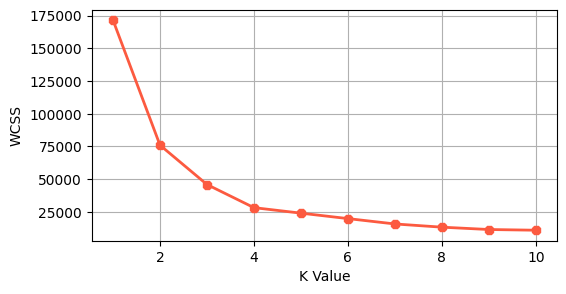

In [ ]:
X1=data.loc[:, ['Age', 'Spending Score']].values
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,3))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='#fc5a40', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()



> In this case, the elbow is observed around K=4, suggesting that dividing the data into 4 clusters would be a good choice for K-Means clustering.



In [ ]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)

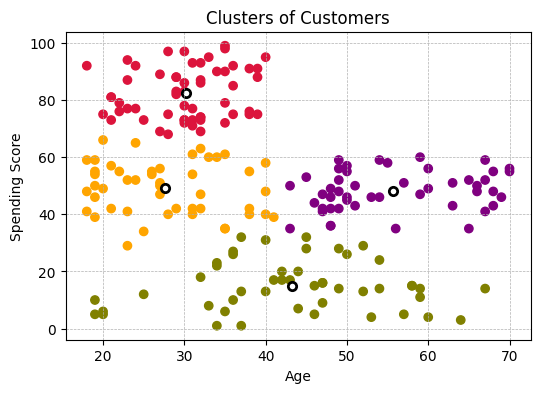

In [ ]:
plt.figure(figsize=(6, 4))
custom_cmap = ListedColormap(['purple', 'crimson', 'olive', 'orange'])
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap=custom_cmap)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='white', edgecolors='black', linewidth=2)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



> The scatter plot revealed 4 distinct clusters, with clear separation based on Age and Spending Score. Each cluster represents customers with similar spending patterns and age groups.



##### Clustering with Annual Income and Spending Score
The second clustering attempt used `Annual Income` and `Spending Score`. The Elbow Method was applied to determine the optimal number of clusters.

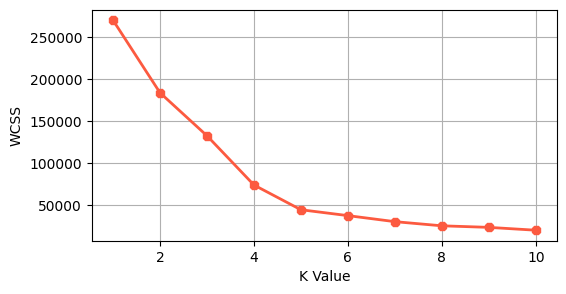

In [ ]:
X2=data.loc[:, ['Annual Income', 'Spending Score']].values
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,3))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='#fc5a40', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()



> The Elbow Method suggested K=5 as the optimal number of clusters. The clusters were visualized in a scatter plot.



In [ ]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)

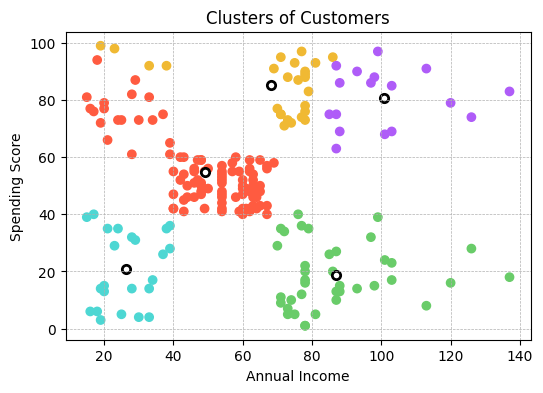

In [ ]:
plt.figure(figsize=(6, 4))
custom_cmap = ListedColormap(['#ff5b40', '#69cc69', '#f0b933', '#4dd7d3', '#af5cf8'])
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap=custom_cmap)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='white', edgecolors='black', linewidth=2)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



> The scatter plot revealed 5 distinct clusters, with clear separation based on Annual Income and Spending Score. Each cluster highlights different customer spending habits and income levels.



##### Clustering with Age, Annual Income, and Spending Score
Finally, clustering was performed using all three variables: Age, Annual Income, and Spending Score. The Elbow Method was applied to determine the optimal number of clusters.

In [ ]:
# Drop Some Columns
df = data.drop(['Age Category', 'Score Category', 'Income Category'], axis=1)

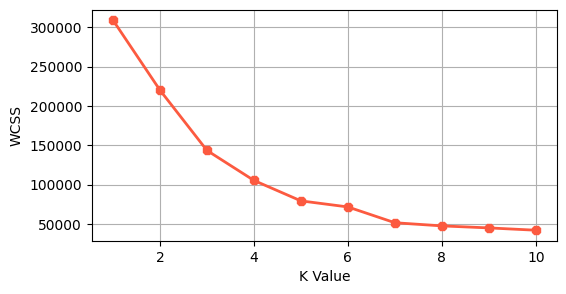

In [ ]:
X3=df.iloc[:, 1:]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,3))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='#fc5a40', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()



> The Elbow Method plot for all three variables (Age, Annual Income, and Spending Score) suggests K=5 as the optimal number of clusters, as the "elbow point" is most prominent at K=5. This indicates that dividing the data into 5 clusters can provide effective segmentation based on all features combined.



In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)

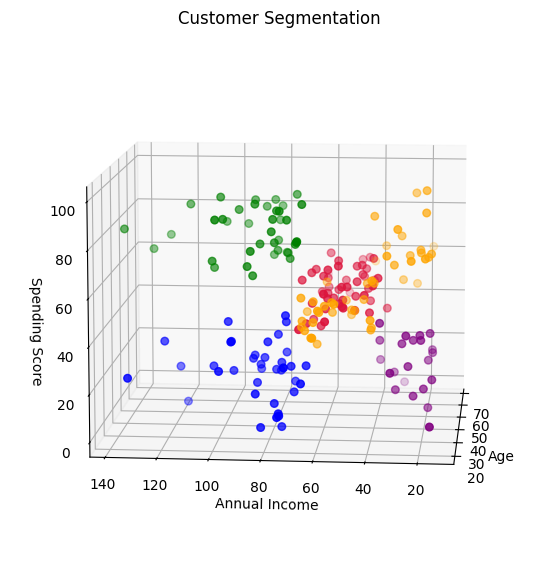

In [ ]:
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Calculate distances to centroids
distances = np.linalg.norm(X3 - kmeans.cluster_centers_[df['label']], axis=1)
max_distance = distances.max()
alpha_values = 1 - (distances / max_distance)

custom_cmap = ListedColormap(['crimson', 'orange', 'green', 'blue', 'purple'])
ax.scatter(df['Age'], df['Annual Income'], df['Spending Score'], c=df['label'], cmap=custom_cmap, s=30, alpha=alpha_values)

ax.set_title('Customer Segmentation')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.view_init(10, 185)
plt.show()



> The 3D plot displays five distinct clusters based on the variables Age, Annual Income, and Spending Score. Each cluster is visually separated, with customers in each cluster sharing similar traits across the three dimensions. The transparency of the points reflects their relative distance from the cluster centers, providing insight into the compactness and variability within each group.



#### CONCLUSION
This project successfully utilized K-Means clustering to segment customers into distinct groups based on age, income, and spending score. Insights derived from the analysis can help businesses tailor marketing strategies and optimize resource allocation. By visualizing clusters in 2D and 3D, clear patterns in customer behaviors were revealed, highlighting the value of data-driven segmentation in understanding diverse customer needs.

#### INTERACTIVE VISUAL

In [ ]:
import plotly.graph_objects as go

In [ ]:
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

# Define colors for the clusters
colors = ['crimson', 'orange', 'green', 'blue', 'purple']
cluster_colors = [colors[label] for label in df['label']]

# Create 3D Scatterplot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter3d(
    x=df['Age'], y=df['Annual Income'], z=df['Spending Score'], mode='markers',
    marker=dict(size=5, color=cluster_colors, opacity=0.7),
    name='Customers'
))

# Add centroids
fig.add_trace(go.Scatter3d(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    z=kmeans.cluster_centers_[:, 2],
    mode='markers', marker=dict(size=2, color='black', symbol='x'), name='Centroids'
))

# Set axis titles
fig.update_layout(
    title='Customer Segmentation (Interactive 3D Visual)',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Spending Score'
    )
)

# Show interactive plot
fig.show()